Generate clusters
---

In [2]:
from sklearn.datasets.samples_generator import make_blobs

# Generate data
X, y = make_blobs(
    n_samples=150, centers=3, n_features=2, cluster_std=0.5, random_state=0)

print('X (features):', X.shape)
print('y (true labels):', y.shape)

X (features): (150, 2)
y (true labels): (150,)


Plotting function
---

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Plot data
def plot(ax, X, y, centroids=None, title=None):
    
    # Plot each cluster
    for cluster in np.unique(y):
        # Find points in this cluster
        idx = (y == cluster)

        # Plot these points
        ax.scatter(X[idx, 0], X[idx, 1], label='cluster {}'.format(cluster))
        
    # Plot centroids
    if centroids is not None:
        for centroid in centroids:
            ax.plot(centroid[0], centroid[1], marker='*', color='black', markersize=16)
        
    # Add legend, labels
    if title is not None:
        ax.set_title(title)
    ax.set_xlabel('feature 1')
    ax.set_ylabel('feature 2')
    ax.set_aspect('equal', adjustable='box')
    ax.legend(frameon=True, facecolor='white', loc='lower left')
    plt.show()

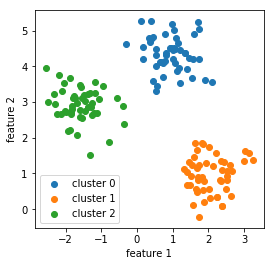

In [4]:
# Plot ground truth
fig = plt.figure()
plot(fig.gca(), X, y)

K-means algorithm (step by step)
---

In [5]:
# Set k
k = 3

In [6]:
# Function to get initial centroids
def init_cluster(X):
    centroids_idx = np.random.choice(len(X), size=k, replace=False)
    centroids = X[centroids_idx]
    return centroids

In [7]:
# Assign points to the closest centroid
def get_clusters(centroids):
    # Distance from each centroid to each point
    distances = []
    for i in range(k):
        # Get centroid
        centroid = centroids[i]
        
        # |point - centroid|^2
        distance = np.sum(np.square(X - centroids[i]), axis=1)
        distances.append(distance)
    distances = np.array(distances).T
    
    # Assign points to closest centroid
    clusters = distances.argmin(axis=1)
    return clusters

In [8]:
# Compute new centroids
def get_centroids(X, clusters):
    new_centroids = []

    for i in range(k):
        # Points in the cluster
        points_idx = (clusters == i)

        # Compute center of the cluster
        center = np.mean(X[points_idx], axis=0)
        new_centroids.append(center)

    return new_centroids

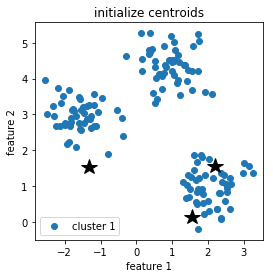

Step: 1


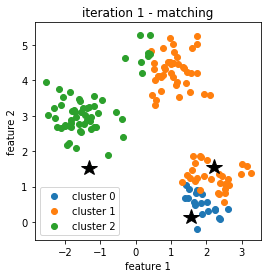

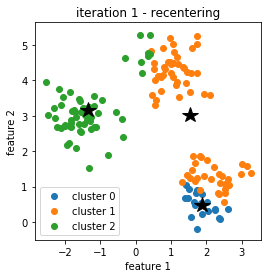

Step: 2


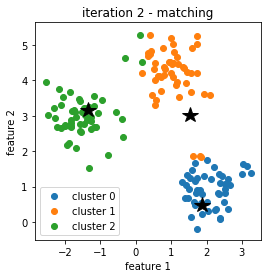

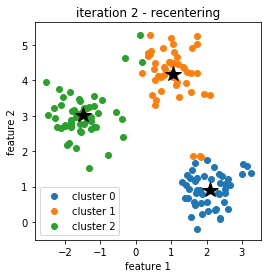

Step: 3


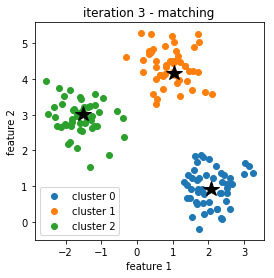

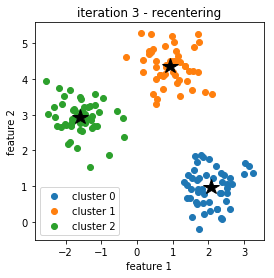

Step: 4


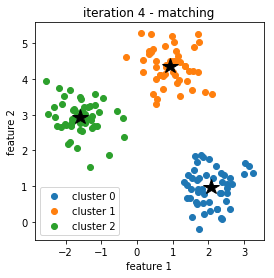

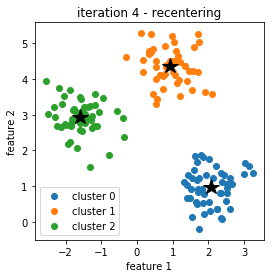

In [9]:
# Set random state
np.random.seed(7)
    
# Generate centroids
centroids = init_cluster(X)
clusters = np.full_like(y, fill_value=1)

# Plot initial centroids
fig = plt.figure()
plot(fig.gca(), X, clusters, centroids, title='initialize centroids')

# k-means step by step
n_steps = 4

for i in range(1, n_steps+1):
    # Print step number
    print('Step:', i)
    
    # Match points to closest centroid
    clusters = get_clusters(centroids)
    fig = plt.figure()
    plot(fig.gca(), X, clusters, centroids, title='iteration {} - matching'.format(i))
    
    # Compute new centroids
    centroids = get_centroids(X, clusters)
    fig = plt.figure()
    plot(fig.gca(), X, clusters, centroids, title='iteration {} - recentering'.format(i))

# Example of K-means with unintuitive and possibly unexpected clusters

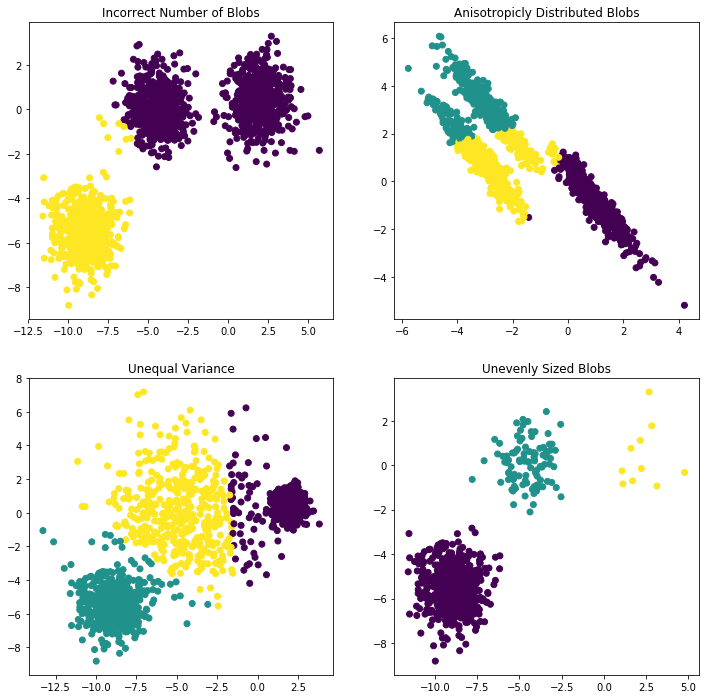

In [1]:
# Author: Phil Roth <mr.phil.roth@gmail.com>
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

plt.figure(figsize=(12, 12))

n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state)

# Incorrect number of clusters
y_pred = KMeans(n_clusters=2, random_state=random_state).fit_predict(X)

plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("Incorrect Number of Blobs")

# Anisotropicly distributed data
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_aniso)

plt.subplot(222)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred)
plt.title("Anisotropicly Distributed Blobs")

# Different variance
X_varied, y_varied = make_blobs(
    n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state
)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_varied)

plt.subplot(223)
plt.scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred)
plt.title("Unequal Variance")

# Unevenly sized blobs
X_filtered = np.vstack((X[y == 0][:500], X[y == 1][:100], X[y == 2][:10]))
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_filtered)

plt.subplot(224)
plt.scatter(X_filtered[:, 0], X_filtered[:, 1], c=y_pred)
plt.title("Unevenly Sized Blobs")

plt.show()